# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to find the current directory
import os
os. getcwd()

'C:\\Users\\neenu'

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape
print('The number of rows =', df.shape[0])
print('The number of columns =', df.shape[1])

The number of rows = 1898
The number of columns = 9


#### Observations:
The number of rows = 1898 ,The number of columns = 9



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 3 different datatypes in the dataset- Integer,Object{string},Float



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
print('Minimum value=',df['food_preparation_time'].min())
print('Average value=',round(df['food_preparation_time'].mean(),2))
print('Maximum value=',df['food_preparation_time'].max())



Minimum value= 20
Average value= 27.37
Maximum value= 35


In [8]:
df.describe() #another method to get the  min,max,mean.

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

Minimum time for food preparation= 20 min

Average time for food preparation= 27.37 min

Maximum time for food preparation= 35 min

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Distribution of Numerical columns


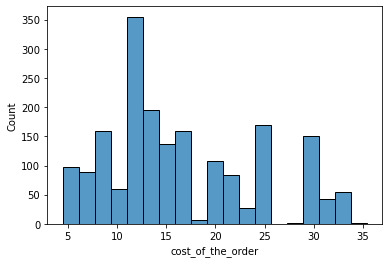

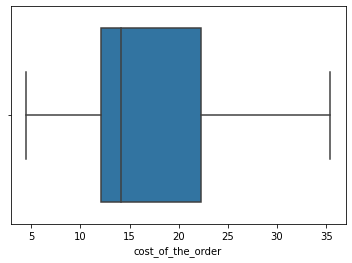

In [10]:
#Observations on cost of the order

sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

### OBSERVATION

From this plot,we can say,

a.The distribution is Right Skewed

b.Median is around 14

c.The Minimum value is 5

d.The maximum value is 35

e.THe first quartile (first 25%) is at 12.5

d.The third quartile(75%) is at 22.5

e.Middle 50% of the data ranges from 12.5 to 22.5

f.The interquartile range is 10.5



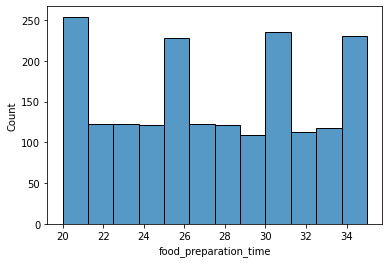

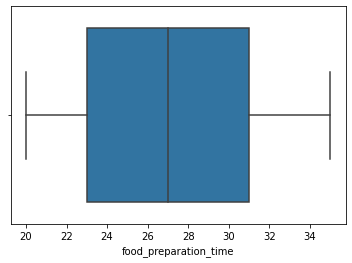

In [11]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

### OBSERVATION

From this plot,we can say,

a.The distribution is Multimodal as it has more than two distinct peaks

b.Median is around 27

c.The Minimum value is 20

d.The maximum value is 35

e.THe first quartile (first 25%) is at 23

d.The third quartile(75%) is at 31

e.Middle 50% of the data ranges from 23 to 31

f.The interquartile range is 8


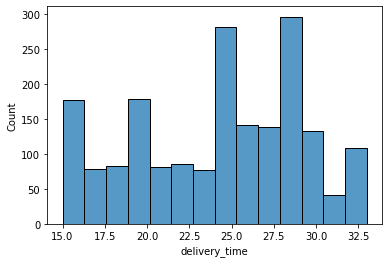

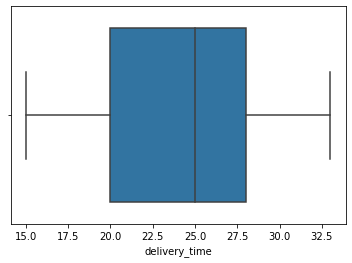

In [30]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### OBSERVATION

From this plot,we can say,

a.The distribution is Left Skewed

b.Median is around 25

c.The Minimum value is 15

d.The maximum value is 33

e.THe first quartile (first 25%) is at 20

d.The third quartile(75%) is at 28

e.Middle 50% of the data ranges from 20 to 28

f.The interquartile range is 8


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [12]:
df['restaurant_name'].value_counts().head()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of number of order are as follows-:

Shake Shack                  ,219 

The Meatball Shop            ,132

Blue Ribbon Sushi            ,119

Blue Ribbon Fried Chicken     ,96

Parm                          ,68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [13]:
df_weekend=df[df['day_of_the_week']=='Weekend']
df_weekend['cuisine_type'].value_counts().head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is American

In [14]:
a=df[df['day_of_the_week']=='Weekend'].shape[0]
b=df[df['day_of_the_week']=='Weekday'].shape[0]
print('weekend orders',a)
print('weekday orders',b)
print('% weekend orders',a/(a+b)*100)

weekend orders 1351
weekday orders 547
% weekend orders 71.18018967334035


Majority of the orders are in Weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [15]:
df_cost=df[df['cost_of_the_order']>20]
round(df_cost.shape[0]/df.shape[0]*100,2)

29.24

#### Observations:
29.24% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [16]:
round(df['delivery_time'].mean(),)

24

#### Observations:
The mean order delivery time is 24 minutes 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [17]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The most frequent customers are with Customer Id: 52832,47440,83287 

The Customer Id -52832 placed 13 orders , Customer Id -47440 placed 10 orders and Customer Id-83287 placed 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


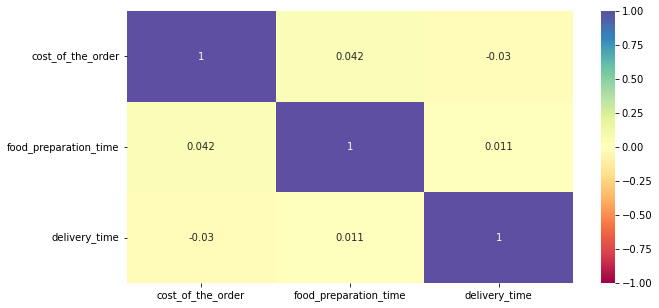

In [18]:
df_corr=df[['cost_of_the_order','food_preparation_time','delivery_time']]
plt.figure(figsize=(10,5))
sns.heatmap(df_corr.corr(),annot =True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

 ### OBSERVATION
 
 There is no correlation between Cost of order and Food preparation time
 
 There is no correlation between Cost of order and Delivery time

 There is no correlation between Delivery time and Food preparation time
 
 The correlation with Order Id and customer Id are Ignored since they are identifiers;Any change to these two variables does not impact any feature.

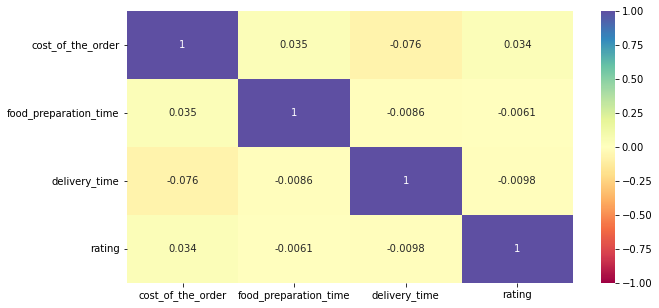

In [19]:
df_corr_v2 = df[df['rating'] != 'Not given'].reset_index()
df_corr_v2['rating'] = df_corr_v2['rating'].astype(int)
df_corr_v2=df_corr_v2[['cost_of_the_order','food_preparation_time','delivery_time','rating']]
plt.figure(figsize=(10,5))
sns.heatmap(df_corr_v2.corr(),annot =True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

### OBSERVATION 
Though not significant, the rating increases with decrease in food prep time and delivery time

Bi Variate analysis of categorical values and continous variable

In [20]:
df.groupby(by='cuisine_type').agg('mean')[['cost_of_the_order','food_preparation_time','delivery_time']]

,cost_of_the_order,food_preparation_time,delivery_time
cuisine_type,,,
American,16.319829,27.440068,24.193493
Chinese,16.305209,27.511628,23.855814
French,19.793889,26.888889,25.333333
Indian,16.919726,27.109589,24.082192
Italian,16.418691,27.483221,24.567114
Japanese,16.304532,27.510638,24.131915
Korean,14.001538,25.461538,20.923077
Mediterranean,15.474783,27.000000,23.586957
Mexican,16.933117,26.727273,24.389610


In [21]:
df.groupby(by='rating').agg('mean')[['cost_of_the_order','food_preparation_time','delivery_time']]

,cost_of_the_order,food_preparation_time,delivery_time
rating,,,
3,16.223351,27.430851,24.558511
4,16.710337,27.396373,23.867876
5,16.965697,27.355442,24.212585
Not given,16.085340,27.357337,24.173913


<AxesSubplot:xlabel='count', ylabel='cuisine_type'>

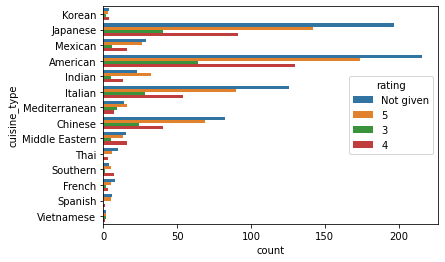

In [22]:
sns.countplot(data=df,y='cuisine_type',hue='rating')

### OBSERVATION 
Japanese , Italian, American and Chinese are the most prefered cuisine 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [23]:
# 1. group by restaurants to count ordr ID and select those with >50 counts
# 2. remove 'Not given' rows from the dataframe
# 3.  group by restaurants to count avg rating and select those with >4 rating
# 4. Join both dataframe

value_counts_restaurant=df['restaurant_name'].value_counts()
df_value_counts_restaurant = pd.DataFrame(value_counts_restaurant)
df_value_counts_restaurant = df_value_counts_restaurant.reset_index()
df_value_counts_restaurant.rename(columns = {'index':'restaurant_name', 'restaurant_name':'count'}, inplace = True)
df_value_counts_restaurant = df_value_counts_restaurant[df_value_counts_restaurant['count'] > 50]
df_value_counts_restaurant

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55


In [24]:
df_avg_rating = df[df['rating'] != 'Not given'].reset_index()
df_avg_rating['rating']=df_avg_rating['rating'].astype(int)
df_avg_rating_grpby = df_avg_rating.groupby(['restaurant_name'])['rating'].mean()
df_avg_rating_grpby = pd.DataFrame(df_avg_rating_grpby).reset_index()
df_avg_rating_grpby = df_avg_rating_grpby[df_avg_rating_grpby['rating']>4]
df_avg_rating_grpby

,restaurant_name,rating
0,'wichcraft,5.000000
1,12 Chairs,4.500000
3,67 Burger,5.000000
4,Amma,4.500000
6,Anjappar Chettinad,5.000000
...,...,...
149,Yama 49,5.000000
150,Yama Japanese Restaurant,4.500000
153,da Umberto,5.000000
154,ilili Restaurant,4.153846


In [25]:
df_final = df_value_counts_restaurant.merge(df_avg_rating_grpby,on='restaurant_name' ,how='left')
df_final

,restaurant_name,count,rating
0,Shake Shack,219,4.278195
1,The Meatball Shop,132,4.511905
2,Blue Ribbon Sushi,119,4.219178
3,Blue Ribbon Fried Chicken,96,4.328125
4,Parm,68,4.128205
5,RedFarm Broadway,59,4.243902
6,RedFarm Hudson,55,4.176471


#### Observations:
The restaurants fulfilling the criteria to get the promotional offer are as follows

Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken,Parm,RedFarm Broadway,RedFarm Hudson	

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [26]:
df['revenue_generated']=np.where(df['cost_of_the_order'] > 20, 0.25*df['cost_of_the_order'], 
         (np.where(df['cost_of_the_order'] > 5, 0.15*df['cost_of_the_order'],0)))
print('net revenue generated by the company across all orders',round(df['revenue_generated'].sum(),2))

net revenue generated by the company across all orders 6166.3


#### Observations:
The net revenue generated by the company across all orders 6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [27]:
sum_column = df["food_preparation_time"] + df["delivery_time"]
df['total time']=sum_column
print ('Total orders with >60min',df[df['total time']>60].shape[0])
print ('Total orders',df.shape[0])
print ('% Total orders with >60min',round(df[df['total time']>60].shape[0]/df.shape[0]*100,2))


Total orders with >60min 200
Total orders 1898
% Total orders with >60min 10.54


#### Observations:
10.54% of orders take more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [28]:
df_weekday=df[df['day_of_the_week']=='Weekday']
round(df_weekday['delivery_time'].mean(),2)
print('delivery time of weekday =', round(df_weekday['delivery_time'].mean(),))

delivery time of weekday = 28


In [29]:
df_weekend=df[df['day_of_the_week']=='Weekend']
round(df_weekend['delivery_time'].mean(),2)
print('delivery time of weekend =', round(df_weekend['delivery_time'].mean(),))

delivery time of weekend = 22


#### Observations:
The mean delivery time during weekdays and weekends are 28 minutes and 22 minutes respectively

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  1. American , Japanese and Italian cuisine are the most popular cusines in the area
   2. Above 2/3 of the order has order price <$20. Hence not many go for bulk order
   3. The meatball shop is one of the best rated restaurant with >4.5 ratings and >100 orders
   4. Majority of the orders are in weekends
   5. Delivery time during Weekend is less than Weekdays. This could be due to availibility of more delivery driver'
   6. Around 10% of the Orders went above 60 min. 

### Recommendations:

*  1. Since American , Japanese and Italian cuisine are the most popular cusines in the area. Any new cuisine of the aforementioned type should be given more preference
  2. Though not significant, the rating increases with decrease in food prep time and delivery time. Hence we need to make sure that the total time (food prep + delivery time) can be reduced.
  3. Since weekdays we see more delivery time. We can encourage delivery drivers to work on weekdays by providing incentives
  4. We can provide free delivery for orders greater than 20 dollars. this will make customers order more than 20 dollar with a joy that they are not wasting on delivery charges and hence we will be able to generate more revenue from the restaurant. 

---